# Machine learning intro

## sources
https://github.com/machinelearningmindset/machine-learning-course
https://medium.com/explore-artificial-intelligence/an-introduction-to-recurrent-neural-networks-72c97bf0912
https://www.analyticsvidhya.com/blog/2019/04/introduction-deep-q-learning-python/
https://keon.io/deep-q-learning/
https://learndatasci.com/tutorials/reinforcement-q-learning-scratch-python-openai-gym/
https://tiewkh.github.io/blog/deepqlearning-openaitaxi/
https://www.alexirpan.com/2018/02/14/rl-hard.html
https://towardsdatascience.com/real-world-examples-of-applied-machine-learning-from-ai-conference-4d4678700c6
https://deeplizard.com/learn/video/xVkPh9E9GfE
https://vas3k.com/blog/machine_learning/
https://nanonets.com/blog/attention-ocr-for-text-recogntion/
https://skymind.ai/wiki/python-ai

All machine learning is AI, but not all AI is machine learning.

![img](img/image17.jpg)

**Supervised learning** : Machine learning, deep learning
**Unsupervised learning** : reinforcement learning

**Deep learning** is a subset of machine learning (deep artificial neural networks)

**Classification** is about predicting a label and **regression** is about predicting a quantity.

**Training set** to train our model and a **testing set** to test its accuracy


## ML tools

    - python
    - numpy - the fundamental package needed for scientific computing with Python.
    - pandas - powerful Python data analysis toolkit
    - scikit-learn 
    - PyTorch - Tensors and Dynamic neural networks in Python with strong GPU acceleration
    - TensorFlow - Computation using data flow graphs for scalable machine learning by Google
    - Keras - a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano
    - OpenAI Gym - a toolkit for developing and comparing reinforcement learning algorithms.

## Summary

Machine learning : 

    => classical learning :
        - supervised :
            * linear regression
            * Decision Trees
            * KNN
            * Naive Bayes
            * Logistic Regression
            * Linear Support Vector Machines
        - unsupervised :
            * Clustering
            * Principal Component Analysis

    => deep learning :
        - Multi-layer Perceptron
        - Convolutional Neural Networks
        - Autoencoders
        - RNN
        - OCR (Optical Character Recognition) & Deep Learning

    => Reinforcement Learning : 
        - Q Learning
        - Deep Q learning

    => Real world examples


## Linear regression
is a technique used to analyze a linear relationship between input variables and a single output variable. A linear relationship means that the data points tend to follow a straight line. 
Simple linear regression involves only a single input variable. (we could have more than one input variable, multiple linear regression)

=> Cost Function, error and squared error, Mean Squared Error (MSE)
=> minimizing the cost function : Ordinary Least Squares, Gradient descent


![title](img/image.png)

## Overfitting / Underfitting 

Regularization : pattern vs noise 
cost func = CF + λ * R
Ridge regression/ Lasso regression


![title](img/image2.png)

## Cross-validation
assures a model is producing accurate results and comparing those results against other models

Holdout Method
K-Fold Cross Validation
Leave-P-Out Cross Validation


![title](img/image3.png)

## Dev

Python

SciKit Learn : general machine learning library, built on top of NumPy

TensorFlow : library for array data calculations and computations that can be used to conduct neural network and deep learning

Keras : high-level framework on top of TensorFlow

PyTorch


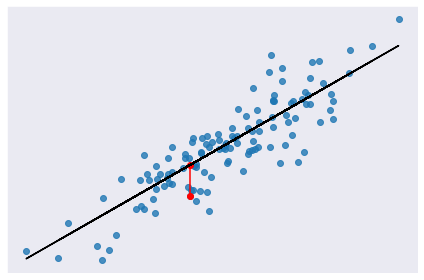

In [3]:
import sys
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install sklearn

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# Create a data set for analysis
x, y = make_regression(n_samples=500, n_features = 1, noise=25, random_state=0)

# Split the data set into testing and training data
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

# Create a linear regression object
#regression = linear_model.LinearRegression()
regression = linear_model.SGDRegressor(max_iter=10000, tol=0.001)

# Train the model using the training set
regression.fit(x_train, y_train)

# Make predictions using the testing set
y_predictions = regression.predict(x_test)

# Grab a sample pair of points to analyze cost
point_number = 2
x_sample = [x_test[point_number].item(), x_test[point_number].item()]
y_sample = [y_test[point_number].item(), y_predictions[point_number].item()]
plt.plot(x_sample, y_sample, color='red', label="cost", marker='o')

# Plot the data
sns.set_style("darkgrid")
sns.regplot(x_test, y_test, fit_reg=False)
plt.plot(x_test, y_predictions, color='black')

# Remove ticks from the plot
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()

## Supervised learning


### Decision Trees
Decision trees are a classifier in machine learning that allows us to make predictions based on previous data. They are like a series of sequential “if … then” statements you feed new data into to get a result.

A Classification Tree, is used to get a result from a set of possible values. A Regression Tree is a decision tree where the result is a continuous value, such as the price of a car.

![title](img/image4.png)
![title](img/image5.png)

Cost of Splitting : cost function, Gini Information Gain
Pruning :  it's beneficial to prune less important splits of a decision tree away. Pruning involves calculating the information gain of each ending sub-tree (the leaf nodes and their parent node), then removing the sub-tree with the least information gain


In [4]:
import sys
!{sys.executable} -m pip install graphviz
import graphviz
import itertools
import random 
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.preprocessing import OneHotEncoder

# The possible values for each class 
classes = {
    'supplies': ['low', 'med', 'high'],
    'weather':  ['raining', 'cloudy', 'sunny'],
    'worked?':  ['yes', 'no']
}

# Our example data from the documentation
data = [
    ['low',  'sunny',   'yes'],
    ['high', 'sunny',   'yes'],
    ['med',  'cloudy',  'yes'],
    ['low',  'raining', 'yes'],
    ['low',  'cloudy',  'no' ],
    ['high', 'sunny',   'no' ],
    ['high', 'raining', 'no' ],
    ['med',  'cloudy',  'yes'],
    ['low',  'raining', 'yes'],
    ['low',  'raining', 'no' ],
    ['med',  'sunny',   'no' ],
    ['high', 'sunny',   'yes']
]

# Our target variable, whether someone went shopping
target = ['yes', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'yes', 'yes', 'no']

# Scikit learn can't handle categorical data, so form numeric representations of the above data
# Categorical data support may be added in the future: https://github.com/scikit-learn/scikit-learn/pull/4899
categories = [classes['supplies'], classes['weather'], classes['worked?']]
encoder = OneHotEncoder(categories=categories)

x_data = encoder.fit_transform(data)

# Form and fit our decision tree to the now-encoded data
classifier = DecisionTreeClassifier()
tree = classifier.fit(x_data, target)

# Now that we have our decision tree, let's predict some outcomes from random data
# This goes through each class and builds a random set of 5 data points
prediction_data = []
for _ in itertools.repeat(None, 5):
    prediction_data.append([
        random.choice(classes['supplies']),
        random.choice(classes['weather']),
        random.choice(classes['worked?'])
    ])

# Use our tree to predict the outcome of the random values
prediction_results = tree.predict(encoder.transform(prediction_data))



# =============================================================================
# Output code

def format_array(arr):
    return "".join(["| {:<10}".format(item) for item in arr])

def print_table(data, results):
    line = "day  " + format_array(list(classes.keys()) + ["went shopping?"])
    print("-" * len(line))
    print(line)
    print("-" * len(line))

    for day, row in enumerate(data):
        print("{:<5}".format(day + 1) + format_array(row + [results[day]]))
    print("")

feature_names = (
    ['supplies-' + x for x in classes["supplies"]] +
    ['weather-' + x for x in classes["weather"]] +
    ['worked-' + x for x in classes["worked?"]]
)

# Shows a visualization of the decision tree using graphviz
# Note that sklearn is unable to generate non-binary trees, so these are based on individual options in each class
#dot_data = export_graphviz(tree, filled=True, proportion=True, feature_names=feature_names) 
#graph = graphviz.Source(dot_data)
#graph.render(filename='decision_tree', cleanup=True, view=True)

# Display out training and prediction data and results
print("Training Data:")
print_table(data, target)

print("Predicted Random Results:")
print_table(prediction_data, prediction_results)

Training Data:
---------------------------------------------------------
day  | supplies  | weather   | worked?   | went shopping?
---------------------------------------------------------
1    | low       | sunny     | yes       | yes       
2    | high      | sunny     | yes       | no        
3    | med       | cloudy    | yes       | no        
4    | low       | raining   | yes       | no        
5    | low       | cloudy    | no        | yes       
6    | high      | sunny     | no        | no        
7    | high      | raining   | no        | no        
8    | med       | cloudy    | yes       | no        
9    | low       | raining   | yes       | no        
10   | low       | raining   | no        | yes       
11   | med       | sunny     | no        | yes       
12   | high      | sunny     | yes       | no        

Predicted Random Results:
---------------------------------------------------------
day  | supplies  | weather   | worked?   | went shopping?
--------------------

### k-Nearest Neighbors

A classifier takes an already labeled data set, and then it trys to label new data points into one of the catagories.
To do this we look at the closest points (neighbors) to the object and the class with the majority of neighbors will be the class that we identify the object to be in.

Brute Force Method : Euclidean distance

K-D Tree Method : The idea behind this method is that if we know that two data points are close to each other and we calculate the Euclidean distance to one of them and then we know that distance is roughly close to the other point. How a K-D tree works is that a node in the tree represents and holds data from an n-dimensional graph. => calculate the Euclidean distance between only the points it is close to until we reach k neighbors.


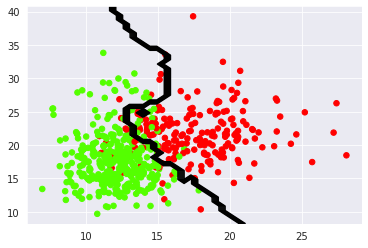

In [5]:
# All the libraries we need for KNN
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
# This is used for our dataset
from sklearn.datasets import load_breast_cancer


# =============================================================================
# We are using sklearn datasets to create the set of data points about breast cancer
# Data is the set data points
# target is the classification of those data points. 
# More information can be found at:
#https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer
# =============================================================================
dataCancer = load_breast_cancer()

# The data[:, x:n] gets two features for the data given. 
# The : part gets all the rows in the matrix. And 0:2 gets the first 2 columns 
# If you want to get a different two features you can replace 0:2 with 1:3, 2:4,... 28:30, 
# there are 30 features in the set so it can only go up to 30.
# If we wanted to plot a 3 dimensional plot then the difference between x and n needs to be 3 instead of two
data = dataCancer.data[:, 0:2]
target = dataCancer.target


# =============================================================================
# This creates the KNN classifier and specifies the algorithm being used and the k
# nearest neighbors used for the algorithm. more information can about KNeighborsClassifier
# can be found at: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
#
# Then it trains the model using the breast cancer dataset. 
# =============================================================================
model = KNeighborsClassifier(n_neighbors = 9, algorithm = 'auto')
model.fit(data, target)


# plots the points 
plt.scatter(data[:, 0], data[:, 1], c=target, s=30, cmap=plt.cm.prism)

# Creates the axis bounds for the grid
axis = plt.gca()
x_limit = axis.get_xlim()
y_limit = axis.get_ylim()

# Creates a grid to evaluate model
x = np.linspace(x_limit[0], x_limit[1])
y = np.linspace(y_limit[0], y_limit[1])
X, Y = np.meshgrid(x, y)
xy = np.c_[X.ravel(), Y.ravel()]

# Creates the line that will separate the data
boundary = model.predict(xy)
boundary = boundary.reshape(X.shape)


# Plot the decision boundary
axis.contour(X, Y,  boundary, colors = 'k')

# Shows the graph
plt.show()


### Naive Bayes Classification


Naive Bayes is a classification technique that uses probabilities we already know to determine how to classify input. These probabilities are related to existing classes and what features they have. 

Bayes’ Theorem => conditional probabilities (the probability of an event happening given another event has happened)

naive => The main thing we will assume is that features are independent. Assuming independence means that the probability of a set of features occurring given a certain class is the same as the product of all the probabilities of each individual feature occurring given that class.           


Gaussian Model (Continuous) : Gaussian models assume features follow a normal distribution

In [6]:
import numpy as np
from sklearn.naive_bayes import GaussianNB

# The features in X are broken down as follows:
# [Red %, Green %, Blue %]

# Some data is created to train with
X = np.array([[.5, 0, .5], [1, 1, 0], [0, 0, 0]])
# These are our target values (Classes: Purple, Yellow, or Black)
y = np.array(['Purple', 'Yellow', 'Black'])

# This is the code we need for the Gaussian model
clf = GaussianNB()
# We train the model on our data
clf.fit(X, y)

# Now we can make a prediction on what class new data belongs to
print("Our data set represents RGB triples and their associated colors.\n")
print("We have trained a Gaussian model on our data set.\n")
print("Let's consider a new input with 100% red, 0% green, and 100% blue.\n")
print("What color does our model think this should be?")
print("Answer: %s!" % clf.predict([[1, 0, 1]])[0])

Our data set represents RGB triples and their associated colors.

We have trained a Gaussian model on our data set.

Let's consider a new input with 100% red, 0% green, and 100% blue.

What color does our model think this should be?
Answer: Purple!


Multinomial Model (Discrete) : Multinomial models are used when we are working with discrete counts. Specifically, we want to use them when we are counting how often a feature occurs.


In [7]:
import numpy as np
from sklearn.naive_bayes import MultinomialNB

# The features in X are broken down as follows:
# [Size, Weight, Color]
#
# Size: 0 = Small, 1 = Moderate, 2 = Large
# Weight: 0 = Light, 1 = Moderate, 2 = Heavy
# Color: 0 = Red, 1 = Blue, 2 = Brown

# Some data is created to train with
X = np.array([[1, 1, 0], [0, 0, 1], [2, 2, 2]])
# These are our target values (Classes: Apple, Blueberry, or Coconut)
y = np.array(['Apple', 'Blueberry', 'Coconut'])

# This is the code we need for the Multinomial model
clf = MultinomialNB()
# We train the model on our data
clf.fit(X, y)

# Now we can make a prediction on what class new data belongs to
print("Our data set represents fruits and their characteristics.\n")
print("We have trained a Multinomial model on our data set.\n")
print("Let's consider a new input that is moderately sized, heavy, and red.\n")
print("What fruit does our model think this should be?")
print("Answer: %s!" % clf.predict([[1, 2, 0]])[0])

Our data set represents fruits and their characteristics.

We have trained a Multinomial model on our data set.

Let's consider a new input that is moderately sized, heavy, and red.

What fruit does our model think this should be?
Answer: Apple!


# Bernoulli Model (Discrete) 
: Unlike the multinomial case, here we are counting whether or not a feature occurred.

In [9]:
import numpy as np
from sklearn.naive_bayes import BernoulliNB

# The features in X are broken down as follows:
# [Walks like a duck, Talks like a duck, Is small]
#
# Walks like a duck: 0 = False, 1 = True
# Talks like a duck: 0 = False, 1 = True
# Is small: 0 = False, 1 = True

# Some data is created to train with
X = np.array([[1, 1, 0], [0, 0, 1], [1, 0, 0]])
# These are our target values (Classes: Duck or Not a duck)
y = np.array(['Duck', 'Not a Duck', 'Not a Duck'])

# This is the code we need for the Bernoulli model
clf = BernoulliNB()
# We train the model on our data
clf.fit(X, y)

# Now we can make a prediction on what class new data belongs to
print("Our data set represents things that are and aren't ducks.\n")
print("We have trained a Bernoulli model on our data set.\n")
print(("Let's consider a new input that:\n"
       "   Walks like a duck\n"
       "   Talks like a duck\n"
       "   Is large\n"))
print("What does our model think this should be?")
print("Answer: %s!" % clf.predict([[1, 1, 1]])[0])

Our data set represents things that are and aren't ducks.

We have trained a Bernoulli model on our data set.

Let's consider a new input that:
   Walks like a duck
   Talks like a duck
   Is large

What does our model think this should be?
Answer: Duck!


### Logistic Regression

Logistic regression is a method for binary classification. It works to divide points in a dataset into two distinct classes, or categories. For simplicity, let's call them class A and class B. The model will give us the probability that a given point belongs in category B. If it is low (lower than 50%), then we classify it in category A. Otherwise, it falls in class B. Logistic regression will instead create a sort of S-curve (using the sigmoid function) which will also help show certainty, since the output from logistic regression is not just a one or zero. 

Logistic regression works using a linear combination of inputs, so multiple information sources can govern the output of the model. The parameters of the model are the weights of the various features, and represent their relative importance to the result. Logistic regression is, at its base, a transformation from a linear predictor to a probability between 0 and 1.

Multinomial Logistic Regression : where the output can be any digit from 0 to 9

![img](img/image6.png)

In [10]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import random

#defines the classification for the training data.
def true_classifier(i):
    if i >= 700:
        return 1
    return 0

#Generate a random dataset which includes random scores from 0 to 1000.
x = np.array([ random.randint(0,1000) for i in range(0,1000) ])

#The model will expect a 2D array, so we must reshape
#For the model, the 2D array must have rows equal to the number of samples,
#and columns equal to the number of features.
#For this example, we have 1000 samples and 1 feature.
x = x.reshape((-1, 1))

#For each point, y is a pass/fail for the grade. The simple threshold is arbitrary,
#and can be changed as you would like. Classes are 1 for success and 0 for failure
y = [ true_classifier(x[i][0]) for i in range(0,1000) ]


#Again, we need a numpy array, so we convert.
y = np.array(y)

#Our goal will be to train a logistic regression model to do pass/fail to the same threshold.
model = LogisticRegression(solver='liblinear')

#The fit method actually fits the model to our training data
model = model.fit(x,y)

#Create 100 random samples to try against our model as test data
samples = [random.randint(0,1000) for i in range(0,100)]
#Once again, we need a 2d Numpy array
samples = np.array(samples)
samples = samples.reshape(-1, 1)

#Now we use our model against the samples.  output is the probability, and _class is the class.
_class = model.predict(samples)
proba = model.predict_proba(samples)

num_accurate = 0

#Finally, output the results, formatted for nicer viewing.
#The format is [<sample value>]: Class <class number>, probability [ <probability for class 0> <probability for class 1>]
#So, the probability array is the probability of failure, followed by the probability of passing.
#In an example run, [7]: Class 0, probability [  9.99966694e-01   3.33062825e-05]
#Means that for value 7, the class is 0 (failure) and the probability of failure is 99.9%
for i in range(0,100):
    if (true_classifier(samples[i])) == (_class[i] == 1):
        num_accurate = num_accurate + 1
    print("" + str(samples[i]) + ": Class " + str(_class[i]) + ", probability " + str(proba[i]))
#skip a line to separate overall result from sample output
print("")
print(str(num_accurate) +" out of 100 correct.")

[898]: Class 1, probability [0.0389984 0.9610016]
[433]: Class 0, probability [0.97878645 0.02121355]
[639]: Class 0, probability [0.67141518 0.32858482]
[169]: Class 0, probability [9.99601091e-01 3.98908682e-04]
[679]: Class 0, probability [0.52730637 0.47269363]
[175]: Class 0, probability [9.99563197e-01 4.36803472e-04]
[895]: Class 1, probability [0.04073572 0.95926428]
[578]: Class 0, probability [0.83720971 0.16279029]
[93]: Class 0, probability [9.99873655e-01 1.26344736e-04]
[463]: Class 0, probability [0.96700124 0.03299876]
[894]: Class 1, probability [0.04133113 0.95866887]
[314]: Class 0, probability [0.9964325 0.0035675]
[500]: Class 0, probability [0.94363365 0.05636635]
[482]: Class 0, probability [0.95648802 0.04351198]
[348]: Class 0, probability [0.99404675 0.00595325]
[310]: Class 0, probability [0.99664132 0.00335868]
[895]: Class 1, probability [0.04073572 0.95926428]
[92]: Class 0, probability [9.99875552e-01 1.24447583e-04]
[730]: Class 1, probability [0.3402073

### Linear Support Vector Machines

The point of SVM's are to try and find a line or hyperplane to divide a dimensional space which best classifies the data points. If we were trying to divide two classes A and B, we would try to best separate the two classes with a line. On one side of the line/hyperplane would be data from class A and on the other side would be from class B.

The algorithm chooses the line/hyperplane with the maximum margin. Maximizing the margin will give us the optimal line to classify the data. 
The data that is closest to the line is what determines the optimal line. These data points are called support vectors. The distance from these vectors to the hyperplane is called the margin.

![img](img/image7.png)

non-linearly separable data = kernel trick. Basically, the kernel trick takes the points to a higher dimension to turn non-linearly separable data to linear separable data.

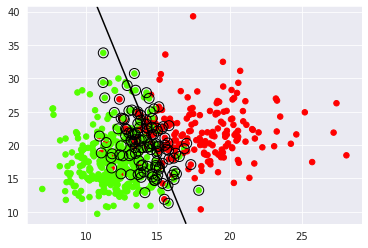

In [11]:
# All the libraries we need for linear SVM
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
# This is used for our dataset
from sklearn.datasets import load_breast_cancer


# =============================================================================
# We are using sklearn datasets to create the set of data points about breast cancer
# Data is the set data points
# target is the classification of those data points. 
# More information can be found athttps://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer
# =============================================================================
dataCancer = load_breast_cancer()

# The data[:, x:n] gets two features for the data given. 
# The : part gets all the rows in the matrix. And 0:2 gets the first 2 columns 
# If you want to get a different two features you can replace 0:2 with 1:3, 2:4,... 28:30, 
# there are 30 features in the set so it can only go up to 30.
# If we wanted to plot a 3 dimensional plot then the difference between x and n needs to be 3 instead of two
data = dataCancer.data[:, 0:2]
target = dataCancer.target

# =============================================================================
# Creates the linear svm model and fits it to our data points
# The optional parameter will be default other than these two,
# You can find the other parameters at https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
# =============================================================================
model = svm.SVC(kernel = 'linear', C = 10000)
model.fit(data, target)


# plots the points 
plt.scatter(data[:, 0], data[:, 1], c=target, s=30, cmap=plt.cm.prism)

# Creates the axis bounds for the grid
axis = plt.gca()
x_limit = axis.get_xlim()
y_limit = axis.get_ylim()

# Creates a grid to evaluate model
x = np.linspace(x_limit[0], x_limit[1], 50)
y = np.linspace(y_limit[0], y_limit[1], 50)
X, Y = np.meshgrid(x, y)
xy = np.c_[X.ravel(), Y.ravel()]

# Creates the decision line for the data points, use model.predict if you are classifying more than two 
decision_line = model.decision_function(xy).reshape(Y.shape)


# Plot the decision line and the margins
axis.contour(X, Y,  decision_line, colors = 'k',  levels=[0], 
           linestyles=['-'])
# Shows the support vectors that determine the desision line
axis.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')

# Shows the graph
plt.show()



## Unsupervised learning

### Clustering

Clustering is the process of grouping similar data and isolating dissimilar data. Clustering is used to identify potential groups in a data set while classification is used to match an input to an existing group.

K-Means : K-Means clustering attempts to divide a data set into K clusters using an iterative process. The first step is choosing a center point for each cluster.The second step is assigning each data point to a cluster. We do this by measuring the distance between a data point and each center point and choosing the cluster whose center point is the closest. Now that all the data points belong to a cluster, the third step is recomputing the center point of each cluster. This is just the average of all the data points belonging to the cluster. Now we just repeat the second and third step until the centers stop changing or only change slightly between iterations. K-Means clustering requires us to input the number of expected clusters which isn’t always easy to determine. It can also be inconsistent depending on where we choose the starting center points in the first step







[[4. 1.]
 [7. 4.]
 [1. 4.]]


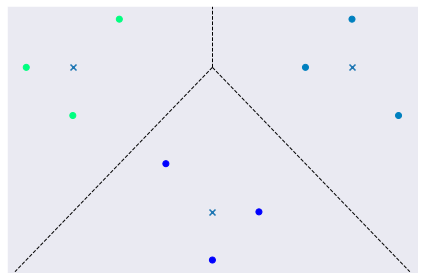

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial import Voronoi, voronoi_plot_2d

# This data set represents a toy manufacturer's product data
#
# The first value in the pair represents a toy:
#    0-2: Action Figures
#    3-5: Building Blocks
#    6-8: Cars
#
# The second value is the age group that buys the most of that toy:
#    0: 5 year-olds
#    1: 6 year-olds
#    2: 7 year-olds
#    3: 8 year-olds
#    4: 9 year-olds
#    5: 10 year-olds
x = np.array([[0,4], [1,3], [2,5], [3,2], [4,0], [5,1], [6,4], [7,5], [8,3]])

# Set up K-Means clustering with a fixed start and stop at 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0).fit(x)

# Plot the data
sns.set_style("darkgrid")
plt.scatter(x[:, 0], x[:, 1], c=kmeans.labels_, cmap=plt.get_cmap("winter"))

# Save the axes limits of the current figure
x_axis = plt.gca().get_xlim()
y_axis = plt.gca().get_ylim()

# Draw cluster boundaries and centers
centers = kmeans.cluster_centers_
print(centers)
plt.scatter(centers[:, 0], centers[:, 1], marker='x')
vor = Voronoi(centers)
voronoi_plot_2d(vor, ax=plt.gca(), show_points=False, show_vertices=False)

# Resize figure as needed
plt.gca().set_xlim(x_axis)
plt.gca().set_ylim(y_axis)

# Remove ticks from the plot
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()

Hierarchical : Hierarchical clustering imagines the data set as a hierarchy of clusters. We could start by making one giant cluster out of all the data points. Inside of this cluster, we find the two least similar sub-clusters and split them. This can be done by using an algorithm to maximize the inter-cluster distance. We continue to split the sub-clusters until every data point belongs to its own cluster or until we decide to stop. => top-down or divisive clustering

Alternatively, we could start by considering a cluster for every data point. The next step would be to combine the two closest clusters into a larger cluster. This can be done by finding the distance between every cluster and choosing the pair with the least distance between them. We would continue this process until we had a single cluster. => bottom-up or agglomerative clustering

Unlike K-Means, Hierarchical clustering is relatively slow so it doesn’t scale as well to large data sets. On the bright side, Hierarchical clustering is more consistent when you run it multiple times and doesn’t require you to know the number of expected clusters.

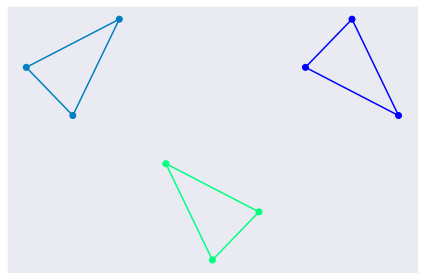

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from collections import defaultdict
from scipy.spatial import ConvexHull

# This data set represents a toy manufacturer's product data
#
# The first value in the pair represents a toy:
#    0-2: Action Figures
#    3-5: Building Blocks
#    6-8: Cars
#
# The second value is the age group that buys the most of that toy:
#    0: 5 year-olds
#    1: 6 year-olds
#    2: 7 year-olds
#    3: 8 year-olds
#    4: 9 year-olds
#    5: 10 year-olds
x = np.array([[0,4], [1,3], [2,5], [3,2], [4,0], [5,1], [6,4], [7,5], [8,3]])

# Set up hierarchical clustering and stop at 3 clusters
num_clusters = 3
hierarchical = AgglomerativeClustering(n_clusters=num_clusters).fit(x)

# Plot the data
sns.set_style("darkgrid")
colors = plt.get_cmap("winter")
points = plt.scatter(x[:, 0], x[:, 1], c=hierarchical.labels_,
            cmap=colors)

# Draw in the cluster regions
regions = defaultdict(list)
# Split points based on cluster
for index, label in enumerate(hierarchical.labels_):
    regions[label].append(list(x[index]))

# If a cluster has more than 2 points, find the convex hull for the region
# Otherwise just draw a connecting line
for key in regions:
    cluster = np.array(regions[key])
    if len(cluster) > 2:
        hull = ConvexHull(cluster)
        vertices = hull.vertices
        vertices = np.append(vertices, hull.vertices[0])
        plt.plot(cluster[vertices, 0], cluster[vertices, 1],
                 color=points.to_rgba(key))
    else:
        np.append(cluster, cluster[0])
        x_region, y_region = zip(*cluster)
        plt.plot(x_region, y_region, color=points.to_rgba(key))

# Remove ticks from the plot
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()

### Principal Component Analysis

Principal component analysis is one technique used to take a large list of interconnected variables and choose the ones that best suit a model. This process of focusing in on only a few variables is called dimensionality reduction, and helps reduce complexity of our dataset.

Feature elimination simply involves pruning features from a dataset we deem unnecessary. A downside of feature elimination is that we lose any potential information gained from the dropped features.

Feature extraction, however, creates new variables by combining existing features. At the cost of some simplicity or interpretability, feature extraction allows you to maintain all important information held within features.

Principal component analysis deals with feature extraction (rather than elimination) by creating a set of independent variables called principal components.
Techniques of performing principal component analysis range from arbitrarily selecting principal components, to automatically finding them until a variance is reached.

Plotting our created dataset...

Points:
( 0.3741, -0.0370)
( 0.3207, -0.3301)
(-1.4980, -0.3971)
(-0.1325, -0.0600)
( 1.4778,  0.9578)
( 0.1741,  0.3947)
( 0.2139, -0.0263)
(-0.0543,  0.0977)
(-0.2944,  0.0599)
( 0.0175,  0.0819)
...



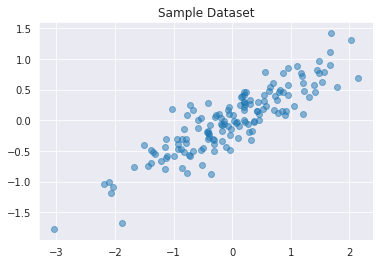

Plotting our calculated principal components...



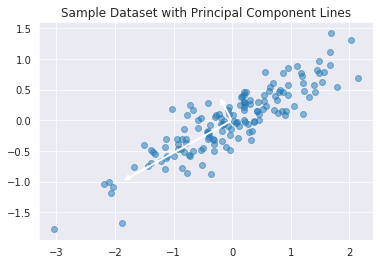

Plotting our dataset with a dimensionality reduction...


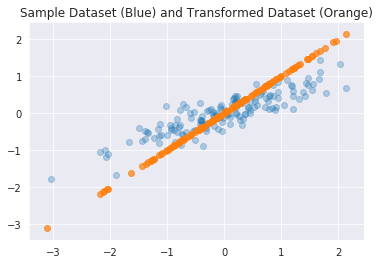

In [14]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# A value we picked to always display the same results
# Feel free to change this to any value greater than 0 view different random value outcomes
seed = 9000

# We're using a seeded random state so we always get the same outcome
seeded_state = np.random.RandomState(seed=seed)

# Returns a random 150 points (x, y pairs) in a gaussian distribution,
# IE most of the points fall close to the average with a few outliers
rand_points = seeded_state.randn(150, 2)

# The @ operator performs matrix multiplication, and serves to bring
# our gaussian distribution points closer together
points = np.matmul(rand_points,seeded_state.rand(2, 2))
x = points[:, 0]
y = points[:, 1]

# Now we have a sample dataset of 150 points to perform PCA on, so
# go ahead and display this in a plot.
plt.scatter(x, y, alpha=0.5)
plt.title("Sample Dataset")

print("Plotting our created dataset...\n")
print("Points:")
for p in points[:10, :]:
    print("({:7.4f}, {:7.4f})".format(p[0], p[1]))
print("...\n")

plt.show()

# Find two principal components from our given dataset
pca = PCA(n_components = 2)
pca.fit(points)

# Once we are fitted, we have access to inner mean_, components_, and explained_variance_ variables
# Use these to add some arrows to our plot
plt.scatter(x, y, alpha=0.5)
plt.title("Sample Dataset with Principal Component Lines")

for var, component in zip(pca.explained_variance_, pca.components_):
    plt.annotate(
        "",
        component * np.sqrt(var) * 2 + pca.mean_,
        pca.mean_,
        arrowprops = {
            "arrowstyle": "->",
            "linewidth": 2
        }
    )

print("Plotting our calculated principal components...\n")

plt.show()

# Reduce the dimensionality of our data using a PCA transformation
pca = PCA(n_components = 1)
transformed_points = pca.fit_transform(points)

# Note that all the inverse transformation does is transforms the data to its original space.
# In practice, this is unnecessary. For this example, all data would be along the x axis.
# We use it here for visualization purposes
inverse = pca.inverse_transform(transformed_points)
t_x = inverse[:, 0]
t_y = inverse[:, 0]

# Plot the original and transformed data sets
plt.scatter(x, y, alpha=0.3)
plt.scatter(t_x, t_y, alpha=0.7)
plt.title("Sample Dataset (Blue) and Transformed Dataset (Orange)")

print("Plotting our dataset with a dimensionality reduction...")

plt.show()

## Deep learning

### Multi-layer Perceptron

A multilayer perceptron (MLP) is a deep, artificial neural network. A neural network is comprised of layers of nodes which activate at various levels depending on the previous layer's nodes.

Multilayer perceptron refers to a neural network with at least three layers of nodes, an input layer, some number of intermediate layers, and an output layer. Each node in a given layer is connected to every node in the adjacent layers. The input layer is just that, it is the way the network takes in data. The intermediate layer(s) are the computational machine of the network, they actually transform the input to the output. The output layer is the way that results are obtained from the neural network.

![img](img/image8.png)

**fully connected" layers** : all nodes in a given layer have a weight to all of the nodes in the previous layer

They require labeled sample data, so they carry out supervised learning. For each training sample, nodes activate according to stored weights of the previous layer. During training (and beyond), the weights will not be perfectly accurate, so they will need to change a little bit to meet the desired results. MLPs use a method called backpropagation to learn from training data.

A node is a single unit in a neural network. Nodes activate at different levels depending on a weighted sum of the previous layer's nodes. In practice, the actual activation is the result of a sigmoid function applied to this result, but we will skip over that detail here for simplicity. In MLPs, nodes activate based on all of the nodes in the previous layer.

When training a neural network, the expected output is a level of activation for each node in the output layer. From that information and the actual activation, we can find the cost at each node, and adjust the weights accordingly. The idea of backpropagation is to adjust the weights that determine each node's activation based on the cost.
In these early steps, it will have a high learning rate, making the weights more volatile. After a few iterations, it will be much more stable as it should need smaller adjustments. With that in mind, let's move forward one time step.

The lower the loss, the better a model (unless the model has over-fitted to the training data). The loss is calculated on training and validation and its interperation is how well the model is doing for these two sets. Loss value implies how well or poorly a certain model behaves after each iteration of optimization. Ideally, one would expect the reduction of loss after each, or several, iteration(s).

Logits are the raw scores output by the last layer of a neural network. Before activation takes place.
Softmax function outputs a vector that represents the probability distributions of a list of potential outcomes. it's a way of normalizing
The cross entropy is a summary metric: it sums across the elements.

The accuracy of a model is usually determined after the model parameters are learned and fixed and no learning is taking place. Then the test samples are fed to the model and the number of mistakes (zero-one loss) the model makes are recorded, after comparison to the true targets. Then the percentage of misclassification is calculated.

Adam is an optimization algorithm that can used instead of the classical stochastic gradient descent procedure to update network weights iterative based in training data.

In [1]:
!cd mlp && sh train.sh

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you 

In [2]:
!cd mlp && sh evaluation.sh

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you d

Model restored...
Batch 1, Testing Loss= 0.44727
Batch 2, Testing Loss= 0.43359
Batch 3, Testing Loss= 0.41992
Batch 4, Testing Loss= 0.44727
Batch 5, Testing Loss= 0.45117
Batch 6, Testing Loss= 0.50391
Batch 7, Testing Loss= 0.42773
Batch 8, Testing Loss= 0.46484
Batch 9, Testing Loss= 0.45703
Batch 10, Testing Loss= 0.45703
Batch 11, Testing Loss= 0.48633
Batch 12, Testing Loss= 0.44922
Batch 13, Testing Loss= 0.45898
Batch 14, Testing Loss= 0.48047
Batch 15, Testing Loss= 0.49414
Batch 16, Testing Loss= 0.47461
Batch 17, Testing Loss= 0.48828
Batch 18, Testing Loss= 0.47461
Batch 19, Testing Loss= 0.49219
Total Test Accuracy= 0.46361


### Convolutional Neural Networks

CNNs differ from other neural networks in that sequential layers are not necessarily fully connected. This means that a subset of the input neurons may only feed into a single neuron in the next layer. 
With other neural networks we might use vectors as inputs, but with CNNs we are typically working with images and other objects with many dimensions.

The architecture of a CNN can be broken down into an input layer, a set of hidden layers, and an output layer.

The hidden layers are where the magic happens. The hidden layers will break down our input image in order to identify features present in the image. The initial layers focus on low-level features such as edges while the later layers progressively get more abstract. At the end of all the layers, we have a fully connected layer with neurons for each of our classification values. What we end up with is a probability for each of the classification values.



**convolutional layer** : a convolution is some operation that acts on two input functions and produces an output function that combines the information present in the inputs. The first input will be our image and the second input will be some sort of filter such as a blur or sharpen. When we combine our image with the filter, we extract some information about the image.

The filter or kernel is one of the functions used in the convolution. The filter will likely have a smaller height and width than the input image and can be thought of as a window sliding over the image.

As the filter moves across the image, we are calculating values for the convolution output called a feature map. At each step, we multiply each entry in the image sample and filter elementwise and sum up all the products. This becomes an entry in the feature map.

we moved the filter one unit horizontally or one unit vertically from some previous position. This value is called the stride. 

 If we wanted the feature map to have the same height and width, we could pad the sample. This involves adding zero entries around the sample so that moving the filter keeps the dimensions of the original sample in the feature map. 

 The output of the convolution layer is a set of feature maps. 
 
 ![img](img/image9.png)

**ReLU** : The purpose of this layer is to introduce non-linearity into the system. Basically, real-world problems are rarely nice and linear so we want our CNN to account for this when it trains. 

**pooling layer** : The purpose of pooling layers are to reduce the spatial size of the problem. This in turn reduces the number of parameters needed for processing and the total amount of computation in the CNN. max pooling => In max pooling, we slide a window over the input and take the max value in the window at each step.

 Fully connected layers are used to make the final classification in the CNN. Before moving to the first fully connected layer, we must flatten our input values into a one-dimensional vector that the layer can interpret.

 The output layer uses some function, such as softmax, to convert the neuron values into a probability distribution over our classes.


**Dropout Layer** : is one of the most famous methods in order to prevent over-fitting. This operation randomly kills a portion of the neuron to stochastically force the neuron to learn more useful information.

The problem with training CNNs and other deep learning models is that they are much more complex than the models we covered in earlier modules. This results in training being much more computationally expensive to the point where we would need specialized hardware like GPUs to run our code. 

learning rate policy, placeholders, summaries

In [2]:
!cd cnn && sh train.sh

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models

### Autoencoders

 Autoencoders are a kind of neural networks which imitate their inputs and produce the exact information at their outputs. 
 Encoder and Decoder. The encoder transforms the input into a hidden space (hidden layer). The decoder then reconstructs the input information as the output.

 Undercomplete Autoencoders: In this type, the hidden dimension is smaller than the input dimension. Training such autoencoder lead to capturing the most prominent features.
  it is a feature extraction algorithm it helps us find a representation for our data and we can feed that representation to other algorithms, for example a classifier.

 Regularized Autoencoders, Sparse Autoencoders, Denoising Autoencoders , Contractive Autoencoders , Variational Autoencoders


     |████████████████████████████████| 26.5MB 10.2MB/s eta 0:00:01
     |████████████████████████████████| 4.4MB 17.5MB/s eta 0:00:01
     |████████████████████████████████| 1.6MB 15.1MB/s eta 0:00:01
     |████████████████████████████████| 3.3MB 16.3MB/s eta 0:00:01
     |████████████████████████████████| 2.1MB 18.5MB/s eta 0:00:01
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/

Epoch: 1 - cost= 0.02854
Epoch: 1 - cost= 0.02781
Epoch: 1 - cost= 0.02753
Epoch: 1 - cost= 0.02674
Epoch: 1 - cost= 0.02651
Epoch: 1 - cost= 0.02632
Epoch: 2 - cost= 0.02640
Epoch: 2 - cost= 0.02606
Epoch: 2 - cost= 0.02536
Epoch: 2 - cost= 0.02551
Epoch: 2 - cost= 0.02492
Epoch: 2 - cost= 0.02413
Epoch: 2 - cost= 0.02436
Epoch: 2 - cost= 0.02427
Epoch: 2 - cost= 0.02413
Epoch: 2 - cost= 0.02350
Epoch: 2 - cost= 0.02383
Epoch: 2 - cost= 0.02352
Epoch: 2 - cost= 0.02308
Epoch: 2 - cost= 0.02252
Epoch: 2 - cost= 0.02298
Epoch: 2 - cost= 0.02251
Epoch: 2 - cost= 0.02215
Epoch: 2 - cost= 0.02238
Epoch: 2 - cost= 0.02194
Epoch: 2 - cost= 0.02135
Epoch: 2 - cost= 0.02205
Epoch: 2 - cost= 0.02149
Epoch: 2 - cost= 0.02143
Epoch: 2 - cost= 0.02088
Epoch: 2 - cost= 0.02063
Epoch: 2 - cost= 0.02115
Epoch: 2 - cost= 0.02023
Epoch: 2 - cost= 0.02088
Epoch: 2 - cost= 0.02001
Epoch: 2 - cost= 0.01993
Epoch: 2 - cost= 0.01966
Epoch: 2 - cost= 0.01952
Epoch: 2 - cost= 0.01965
Epoch: 2 - cost= 0.01905


Epoch: 4 - cost= 0.00914
Epoch: 4 - cost= 0.00896
Epoch: 4 - cost= 0.00929
Epoch: 4 - cost= 0.00912
Epoch: 4 - cost= 0.00871
Epoch: 4 - cost= 0.00949
Epoch: 4 - cost= 0.00894
Epoch: 4 - cost= 0.00884
Epoch: 5 - cost= 0.00883
Epoch: 5 - cost= 0.00896
Epoch: 5 - cost= 0.00918
Epoch: 5 - cost= 0.00892
Epoch: 5 - cost= 0.00875
Epoch: 5 - cost= 0.00905
Epoch: 5 - cost= 0.00926
Epoch: 5 - cost= 0.00856
Epoch: 5 - cost= 0.00864
Epoch: 5 - cost= 0.00926
Epoch: 5 - cost= 0.00907
Epoch: 5 - cost= 0.00893
Epoch: 5 - cost= 0.00895
Epoch: 5 - cost= 0.00887
Epoch: 5 - cost= 0.00874
Epoch: 5 - cost= 0.00876
Epoch: 5 - cost= 0.00898
Epoch: 5 - cost= 0.00877
Epoch: 5 - cost= 0.00854
Epoch: 5 - cost= 0.00867
Epoch: 5 - cost= 0.00847
Epoch: 5 - cost= 0.00899
Epoch: 5 - cost= 0.00888
Epoch: 5 - cost= 0.00894
Epoch: 5 - cost= 0.00868
Epoch: 5 - cost= 0.00859
Epoch: 5 - cost= 0.00888
Epoch: 5 - cost= 0.00900
Epoch: 5 - cost= 0.00875
Epoch: 5 - cost= 0.00879
Epoch: 5 - cost= 0.00874
Epoch: 5 - cost= 0.00854


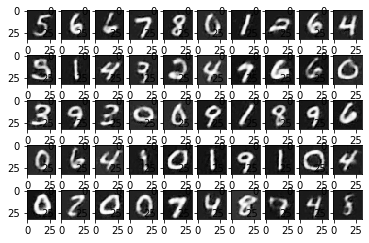

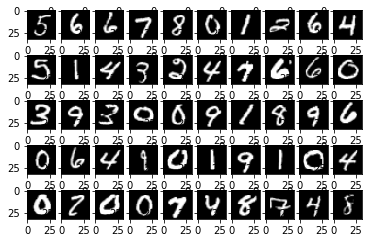

In [6]:
# An undercomplete autoencoder on MNIST dataset
from __future__ import division, print_function, absolute_import
import sys
!{sys.executable} -m pip install scikit-image
import tensorflow.contrib.layers as lays

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from skimage import transform
from tensorflow.examples.tutorials.mnist import input_data

batch_size = 500  # Number of samples in each batch
epoch_num = 5     # Number of epochs to train the network
lr = 0.001        # Learning rate


def resize_batch(imgs):
    # A function to resize a batch of MNIST images to (32, 32)
    # Args:
    #   imgs: a numpy array of size [batch_size, 28 X 28].
    # Returns:
    #   a numpy array of size [batch_size, 32, 32].
    imgs = imgs.reshape((-1, 28, 28, 1))
    resized_imgs = np.zeros((imgs.shape[0], 32, 32, 1))
    for i in range(imgs.shape[0]):
        resized_imgs[i, ..., 0] = transform.resize(imgs[i, ..., 0], (32, 32))
    return resized_imgs


def autoencoder(inputs):
    # encoder
    # 32 x 32 x 1   ->  16 x 16 x 32
    # 16 x 16 x 32  ->  8 x 8 x 16
    # 8 x 8 x 16    ->  2 x 2 x 8
    net = lays.conv2d(inputs, 32, [5, 5], stride=2, padding='SAME')
    net = lays.conv2d(net, 16, [5, 5], stride=2, padding='SAME')
    net = lays.conv2d(net, 8, [5, 5], stride=4, padding='SAME')
    # decoder
    # 2 x 2 x 8    ->  8 x 8 x 16
    # 8 x 8 x 16   ->  16 x 16 x 32
    # 16 x 16 x 32  ->  32 x 32 x 1
    net = lays.conv2d_transpose(net, 16, [5, 5], stride=4, padding='SAME')
    net = lays.conv2d_transpose(net, 32, [5, 5], stride=2, padding='SAME')
    net = lays.conv2d_transpose(net, 1, [5, 5], stride=2, padding='SAME', activation_fn=tf.nn.tanh)
    return net

# read MNIST dataset
mnist = input_data.read_data_sets("MNIST_data", one_hot=True)

# calculate the number of batches per epoch
batch_per_ep = mnist.train.num_examples // batch_size

ae_inputs = tf.placeholder(tf.float32, (None, 32, 32, 1))  # input to the network (MNIST images)
ae_outputs = autoencoder(ae_inputs)  # create the Autoencoder network

# calculate the loss and optimize the network
loss = tf.reduce_mean(tf.square(ae_outputs - ae_inputs))  # claculate the mean square error loss
train_op = tf.train.AdamOptimizer(learning_rate=lr).minimize(loss)

# initialize the network
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for ep in range(epoch_num):  # epochs loop
        for batch_n in range(batch_per_ep):  # batches loop
            batch_img, batch_label = mnist.train.next_batch(batch_size)  # read a batch
            batch_img = batch_img.reshape((-1, 28, 28, 1))               # reshape each sample to an (28, 28) image
            batch_img = resize_batch(batch_img)                          # reshape the images to (32, 32)
            _, c = sess.run([train_op, loss], feed_dict={ae_inputs: batch_img})
            print('Epoch: {} - cost= {:.5f}'.format((ep + 1), c))

    # test the trained network
    batch_img, batch_label = mnist.test.next_batch(50)
    batch_img = resize_batch(batch_img)
    recon_img = sess.run([ae_outputs], feed_dict={ae_inputs: batch_img})[0]

    # plot the reconstructed images and their ground truths (inputs)
    plt.figure(1)
    plt.title('Reconstructed Images')
    for i in range(50):
        plt.subplot(5, 10, i+1)
        plt.imshow(recon_img[i, ..., 0], cmap='gray')

    plt.figure(2)
    plt.title('Input Images')
    for i in range(50):
        plt.subplot(5, 10, i+1)
        plt.imshow(batch_img[i, ..., 0], cmap='gray')
    plt.show()


### Recurrent Neural Networks

A glaring limitation of Vanilla Neural Networks (and also Convolutional Networks) is that their API is too constrained: they accept a fixed-sized vector as input (e.g. an image) and produce a fixed-sized vector as output (e.g. probabilities of different classes). Not only that: These models perform this mapping using a fixed amount of computational steps (e.g. the number of layers in the model).

The core reason that recurrent nets are more exciting is that they allow us to operate over sequences of vectors: Sequences in the input, the output, or in the most general case both.

RNNs combine the input vector with their state vector with a fixed (but learned) function to produce a new state vector : this output vector’s contents are influenced not only by the input you just fed in, but also on the entire history of inputs you’ve fed in in the past. 

![img](img/image10.png)

In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import argparse

def del_all_flags(FLAGS):
    flags_dict = FLAGS._flags()    
    keys_list = [keys for keys in flags_dict]    
    for keys in keys_list:
        FLAGS.__delattr__(keys)

del_all_flags(tf.flags.FLAGS)

# Useful function for arguments.
def str2bool(v):
    return v.lower() in ("yes", "true")

# Parser
parser = argparse.ArgumentParser(description='Creating Classifier')

######################
# Optimization Flags #
######################

tf.app.flags.DEFINE_string('f', '', 'kernel')

tf.app.flags.DEFINE_float('learning_rate', default=0.001, help='initial learning rate')
tf.app.flags.DEFINE_integer('seed', default=111, help='seed')

##################
# Training Flags #
##################
tf.app.flags.DEFINE_integer('batch_size', default=128, help='Batch size for training')
tf.app.flags.DEFINE_integer('num_epoch', default=10, help='Number of training iterations')
tf.app.flags.DEFINE_integer('batch_per_log', default=10, help='Print the log at what number of batches?')

###############
# Model Flags #
###############
tf.app.flags.DEFINE_integer('hidden_size', default=128, help='Number of neurons for RNN hodden layer')

# Store all elemnts in FLAG structure!
args = tf.app.flags.FLAGS


# Reset the graph set the random numbers to be the same using "seed"
tf.reset_default_graph()
tf.set_random_seed(args.seed)
np.random.seed(args.seed)

# Divide 28x28 images to rows of data to feed to RNN as sequantial information
step_size = 28
input_size = 28
output_size = 10

# Input tensors
X = tf.placeholder(tf.float32, [None, step_size, input_size])
y = tf.placeholder(tf.int32, [None])

# Rnn
cell = tf.nn.rnn_cell.BasicRNNCell(num_units=args.hidden_size)
output, state = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

# Forward pass and loss calcualtion
logits = tf.layers.dense(state, output_size)
cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
loss = tf.reduce_mean(cross_entropy)

# optimizer
optimizer = tf.train.AdamOptimizer(learning_rate=args.learning_rate).minimize(loss)

# Prediction
prediction = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(prediction, tf.float32))

# input data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/")

# Process MNIST
X_test = mnist.test.images # X_test shape: [num_test, 28*28]
X_test = X_test.reshape([-1, step_size, input_size])
y_test = mnist.test.labels

# initialize the variables
init = tf.global_variables_initializer()

# Empty list for tracking
loss_train_list = []
acc_train_list = []

# train the model
with tf.Session() as sess:
    sess.run(init)
    n_batches = mnist.train.num_examples // args.batch_size
    for epoch in range(args.num_epoch):
        for batch in range(n_batches):
            X_train, y_train = mnist.train.next_batch(args.batch_size)
            X_train = X_train.reshape([-1, step_size, input_size])
            sess.run(optimizer, feed_dict={X: X_train, y: y_train})
        loss_train, acc_train = sess.run(
            [loss, accuracy], feed_dict={X: X_train, y: y_train})
        loss_train_list.append(loss_train)
        acc_train_list.append(acc_train)
        print('Epoch: {}, Train Loss: {:.3f}, Train Acc: {:.3f}'.format(
            epoch + 1, loss_train, acc_train))
    loss_test, acc_test = sess.run(
        [loss, accuracy], feed_dict={X: X_test, y: y_test})
    print('Test Loss: {:.3f}, Test Acc: {:.3f}'.format(loss_test, acc_test))

Instructions for updating:
This class is equivalent as tf.keras.layers.SimpleRNNCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use keras.layers.Dense instead.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch: 1, Train Loss: 0.279, Train Acc: 0.898
Epoch: 2, Train Loss: 0.124, Train Acc: 0.969
Epoch: 3, Train Loss: 0.142, Train Acc: 0.977
Epoch: 4, Train Loss: 0.187, Train Acc: 0.930
Epoch: 5, Train Loss: 0.119, Train Acc: 0.961
Epoch: 6, Train Loss: 0.153, Train Acc: 0.945
Epoch: 7, Train Loss: 0.153, Train Acc: 0.953
Epoc

### OCR (Optical Character Recognition) & Deep Learning

Used in paperwork - bank cheques and legal documents, ID cards and street signs

=> convert images of digital or hand-written text images to machine readable text in a form your computer can process

=> conventional techniques : image filters, contour detection and image classification which performed well on narrow, template based datasets

The overall pipeline for many architectures for OCR tasks follow this template - a convolutional network to extract image features as encoded vectors followed by a recurrent network that uses these encoded features to predict where each of the letters in the image text might be and what they are.  
 

**Predict the text present in number plate images**

Attention-OCR is an OCR project available on tensorflow as an implementation of this paper and came into being as a way to solve the image captioning problem. 

![img](img/image18.jpg)

First we use layers of convolutional networks to extract encoded image features. These extracted features are then encoded to strings and passed through a recurrent network for the attention mechanism to process. The attention mechanism used in the implementation is borrowed from the Seq2Seq machine translation model. We use this attention based decoder to finally predict the text in our image.

The steps followed are summarized here:

1. Gather annotated training data
2. Get crops for each frame of each video where the number plates are.
3. Generate tfrecords for all the cropped files.
4. Place them in models/research/attention_ocr/python/datasets as required (in the FSNS dataset format). 
6. Train the model using Attention OCR.
7. Make prediction on your own cropped images.

https://app.nanonets.com/




In [8]:
import sys
!{sys.executable} -m pip install requests
!{sys.executable} -m pip install tqdm

!{sys.executable} ./nanonets-ocr-sample-python/code/create-model.py


     |████████████████████████████████| 61kB 2.5MB/s eta 0:00:01
     |████████████████████████████████| 163kB 5.8MB/s eta 0:00:01
     |████████████████████████████████| 61kB 7.2MB/s eta 0:00:011
     |████████████████████████████████| 133kB 12.9MB/s eta 0:00:01
     |████████████████████████████████| 143kB 13.5MB/s eta 0:00:01
     |████████████████████████████████| 61kB 3.1MB/s eta 0:00:01
NEXT RUN: export NANONETS_MODEL_ID=14da5702-cab8-40a8-be57-42147da82580
THEN RUN: python ./code/upload-training.py


In [14]:
import sys
!{sys.executable} ./nanonets-ocr-sample-python/code/upload-training.py

Found directory: ./nanonets-ocr-sample-python/code/../annotations/json
  0%|                                                   | 0/324 [00:00<?, ?it/s]180.json
./nanonets-ocr-sample-python/code/../annotations/json/180.json
  0%|▏                                          | 1/324 [00:01<07:40,  1.42s/it]189.json
./nanonets-ocr-sample-python/code/../annotations/json/189.json
  1%|▎                                          | 2/324 [00:02<07:44,  1.44s/it]133.json
./nanonets-ocr-sample-python/code/../annotations/json/133.json
  1%|▍                                          | 3/324 [00:04<07:39,  1.43s/it]77.json
./nanonets-ocr-sample-python/code/../annotations/json/77.json
  1%|▌                                          | 4/324 [00:06<08:21,  1.57s/it]190.json
./nanonets-ocr-sample-python/code/../annotations/json/190.json
  2%|▋                                          | 5/324 [00:07<08:30,  1.60s/it]114.json
./nanonets-ocr-sample-python/code/../annotations/json/114.json
  2%|▊             

 17%|███████                                   | 54/324 [01:35<07:34,  1.68s/it]155.json
./nanonets-ocr-sample-python/code/../annotations/json/155.json
 17%|███████▏                                  | 55/324 [01:36<07:15,  1.62s/it]221.json
./nanonets-ocr-sample-python/code/../annotations/json/221.json
 17%|███████▎                                  | 56/324 [01:38<07:09,  1.60s/it]321.json
./nanonets-ocr-sample-python/code/../annotations/json/321.json
 18%|███████▍                                  | 57/324 [01:39<07:13,  1.62s/it]218.json
./nanonets-ocr-sample-python/code/../annotations/json/218.json
 18%|███████▌                                  | 58/324 [01:41<07:15,  1.64s/it]262.json
./nanonets-ocr-sample-python/code/../annotations/json/262.json
 18%|███████▋                                  | 59/324 [01:43<07:27,  1.69s/it]235.json
./nanonets-ocr-sample-python/code/../annotations/json/235.json
 19%|███████▊                                  | 60/324 [01:45<07:34,  1.72s/it]206.json

 34%|█████████████▊                           | 109/324 [03:15<06:03,  1.69s/it]85.json
./nanonets-ocr-sample-python/code/../annotations/json/85.json
 34%|█████████████▉                           | 110/324 [03:17<05:46,  1.62s/it]25.json
./nanonets-ocr-sample-python/code/../annotations/json/25.json
 34%|██████████████                           | 111/324 [03:18<05:39,  1.59s/it]79.json
./nanonets-ocr-sample-python/code/../annotations/json/79.json
 35%|██████████████▏                          | 112/324 [03:20<05:47,  1.64s/it]101.json
./nanonets-ocr-sample-python/code/../annotations/json/101.json
 35%|██████████████▎                          | 113/324 [03:22<05:38,  1.60s/it]76.json
./nanonets-ocr-sample-python/code/../annotations/json/76.json
 35%|██████████████▍                          | 114/324 [03:23<05:24,  1.55s/it]142.json
./nanonets-ocr-sample-python/code/../annotations/json/142.json
 35%|██████████████▌                          | 115/324 [03:24<04:55,  1.41s/it]254.json
./nanon

 51%|████████████████████▊                    | 164/324 [04:46<04:00,  1.50s/it]317.json
./nanonets-ocr-sample-python/code/../annotations/json/317.json
 51%|████████████████████▉                    | 165/324 [04:48<04:01,  1.52s/it]80.json
./nanonets-ocr-sample-python/code/../annotations/json/80.json
 51%|█████████████████████                    | 166/324 [04:49<03:47,  1.44s/it]144.json
./nanonets-ocr-sample-python/code/../annotations/json/144.json
 52%|█████████████████████▏                   | 167/324 [04:50<03:37,  1.38s/it]161.json
./nanonets-ocr-sample-python/code/../annotations/json/161.json
 52%|█████████████████████▎                   | 168/324 [04:52<03:48,  1.46s/it]19.json
./nanonets-ocr-sample-python/code/../annotations/json/19.json
 52%|█████████████████████▍                   | 169/324 [04:53<03:49,  1.48s/it]57.json
./nanonets-ocr-sample-python/code/../annotations/json/57.json
 52%|█████████████████████▌                   | 170/324 [04:55<03:56,  1.54s/it]313.json
./nan

 68%|███████████████████████████▋             | 219/324 [06:11<02:37,  1.50s/it]311.json
./nanonets-ocr-sample-python/code/../annotations/json/311.json
 68%|███████████████████████████▊             | 220/324 [06:13<03:07,  1.80s/it]282.json
./nanonets-ocr-sample-python/code/../annotations/json/282.json
 68%|███████████████████████████▉             | 221/324 [06:14<02:43,  1.58s/it]277.json
./nanonets-ocr-sample-python/code/../annotations/json/277.json
 69%|████████████████████████████             | 222/324 [06:16<02:38,  1.55s/it]240.json
./nanonets-ocr-sample-python/code/../annotations/json/240.json
 69%|████████████████████████████▏            | 223/324 [06:17<02:27,  1.46s/it]139.json
./nanonets-ocr-sample-python/code/../annotations/json/139.json
 69%|████████████████████████████▎            | 224/324 [06:18<02:25,  1.46s/it]96.json
./nanonets-ocr-sample-python/code/../annotations/json/96.json
 69%|████████████████████████████▍            | 225/324 [06:20<02:40,  1.62s/it]5.json
./n

 85%|██████████████████████████████████▋      | 274/324 [07:39<01:19,  1.59s/it]140.json
./nanonets-ocr-sample-python/code/../annotations/json/140.json
 85%|██████████████████████████████████▊      | 275/324 [07:41<01:16,  1.56s/it]177.json
./nanonets-ocr-sample-python/code/../annotations/json/177.json
 85%|██████████████████████████████████▉      | 276/324 [07:42<01:11,  1.48s/it]130.json
./nanonets-ocr-sample-python/code/../annotations/json/130.json
 85%|███████████████████████████████████      | 277/324 [07:43<01:05,  1.39s/it]60.json
./nanonets-ocr-sample-python/code/../annotations/json/60.json
 86%|███████████████████████████████████▏     | 278/324 [07:46<01:15,  1.65s/it]15.json
./nanonets-ocr-sample-python/code/../annotations/json/15.json
 86%|███████████████████████████████████▎     | 279/324 [07:47<01:16,  1.69s/it]316.json
./nanonets-ocr-sample-python/code/../annotations/json/316.json
 86%|███████████████████████████████████▍     | 280/324 [07:49<01:11,  1.62s/it]284.json
./n

In [15]:
import sys
!{sys.executable} ./nanonets-ocr-sample-python/code/train-model.py

{"model_id":"14da5702-cab8-40a8-be57-42147da82580","model_type":"ocr","state":3,"status":"In queue for training","accuracy":0,"categories":[{"name":"number_plate","count":318}],"email":"","is_public":false}


NEXT RUN: python ./code/model-state.py


In [24]:
import sys
!{sys.executable} ./nanonets-ocr-sample-python/code/prediction.py ./nanonets-ocr-sample-python/images/17.jpg

{"message":"Success","result":[{"message":"Success","input":"17.jpg","prediction":[{"label":"number_plate","xmin":64,"ymin":220,"xmax":187,"ymax":280,"score":0.9983943,"ocr_text":"TN 74 AH 1413\n"}]}]}


## Reinforcement Learning

A reinforcement learning task is about training an agent which interacts with its environment. The agent arrives at different scenarios known as states by performing actions. Actions lead to rewards which could be positive and negative.

The agent has only one purpose here – to maximize its total reward across an episode. This episode is anything and everything that happens between the first state and the last or terminal state within the environment. We reinforce the agent to learn to perform the best actions by experience. This is the strategy or policy.

1. Observation of the environment
2. Deciding how to act using some strategy
3. Acting accordingly
4. Receiving a reward or penalty
5. Learning from the experiences and refining our strategy
6. Iterate until an optimal strategy is found




**Markov Decision Process (MDP)** : we assume that each state follows a Markov property, i.e., each state depends solely on the previous state and the transition from that state to the current state.

**Q Learning** : Let’s say we know the expected reward of each action at every step. This would essentially be like a cheat sheet for the agent! Our agent will know exactly which action to perform. It will perform the sequence of actions that will eventually generate the maximum total reward. This total reward is also called the Q-value.

Q-value yielded from being at state s and performing action a is the immediate reward r(s,a) plus the highest Q-value possible from the next state s’. This is a recursive equation, we can start with making arbitrary assumptions for all q-values

![img](img/image11.png)

First we use layers of convolutional networks to extract encoded image features. These extracted features are then encoded to strings and passed through a recurrent network for the attention mechanism to process. The attention mechanism used in the implementation is borrowed from the Seq2Seq machine translation model. We use this attention based decoder to finally predict the text in our image.



### Taxi example

**Gym** is a toolkit for developing and comparing reinforcement learning algorithms.

![img](img/image12.png)

- State Space
- Action space

Reward Table : {action: [(probability, nextstate, reward, done)]}

 Q-table & Q-values
 
 ![img](img/image13.png)

 Q-values are initialized to an arbitrary value, and as the agent exposes itself to the environment and receives different rewards by executing different actions, the Q-values are updated using the equation:

Q(state,action)←(1−α)Q(state,action)+α(reward+γmaxaQ(next state,all actions))
Where:

- α (alpha) is the learning rate (0<α≤1) - Just like in supervised learning settings, α is the extent to which our Q-values are being updated in every iteration.

- γ (gamma) is the discount factor (0≤γ≤1) - determines how much importance we want to give to future rewards. A high value for the discount factor (close to 1) captures the long-term effective award, whereas, a discount factor of 0 makes our agent consider only immediate reward, hence making it greedy.

‘exploration rate’ or ‘epsilon’ => agent will randomly select its action at first by a certain percentage

We are assigning (←), or updating, the Q-value of the agent's current state and action by first taking a weight (1−α) of the old Q-value, then adding the learned value. The learned value is a combination of the reward for taking the current action in the current state, and the discounted maximum reward from the next state we will be in once we take the current action.

Basically, we are learning the proper action to take in the current state by looking at the reward for the current state/action combo, and the max rewards for the next state. 

After enough random exploration of actions, the Q-values tend to converge serving our agent as an action-value function which it can exploit to pick the most optimal action from a given state.

There's a tradeoff between exploration (choosing a random action) and exploitation (choosing actions based on already learned Q-values). We want to prevent the action from always taking the same route, and possibly overfitting, so we'll be introducing another parameter called ϵ "epsilon" to cater to this during training.

### No RL

In [19]:
import sys
!{sys.executable} -m pip install gym
import gym
import numpy as np
import random

from IPython.display import clear_output
from time import sleep

def print_frames(frames):
    for i, frame in enumerate(frames):
        clear_output(wait=True)
        print(frame['frame'])
        print(f"Timestep: {i + 1}")
        print(f"State: {frame['state']}")
        print(f"Action: {frame['action']}")
        print(f"Reward: {frame['reward']}")
        sleep(.1)

env = gym.make("Taxi-v3").env

env.reset()
state = env.encode(3, 1, 2, 0) # (taxi row, taxi column, passenger index, destination index)
print("State:", state)

env.s = state
env.render()

print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))

print(env.P[328])

epochs = 0
penalties, reward = 0, 0

frames = [] # for animation

done = False

while not done:
    action = env.action_space.sample()
    state, reward, done, info = env.step(action)

    if reward == -10:
        penalties += 1
    
    # Put each rendered frame into dict for animation
    frames.append({
        'frame': env.render(mode='ansi'),
        'state': state,
        'action': action,
        'reward': reward
        }
    )

    epochs += 1
    
    
print("Timesteps taken: {}".format(epochs))
print("Penalties incurred: {}".format(penalties))
        



State: 328
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

Action Space Discrete(6)
State Space Discrete(500)
{0: [(1.0, 428, -1, False)], 1: [(1.0, 228, -1, False)], 2: [(1.0, 348, -1, False)], 3: [(1.0, 328, -1, False)], 4: [(1.0, 328, -10, False)], 5: [(1.0, 328, -10, False)]}
Timesteps taken: 4861
Penalties incurred: 1598


### Q-learning

In [20]:
import gym
import numpy as np
import random

from IPython.display import clear_output
from time import sleep

def print_frames(frames):
    for i, frame in enumerate(frames):
        clear_output(wait=True)
        print(frame['frame'])
        print(f"Timestep: {i + 1}")
        print(f"State: {frame['state']}")
        print(f"Action: {frame['action']}")
        print(f"Reward: {frame['reward']}")
        sleep(.1)

env = gym.make("Taxi-v3").env

env.reset()
state = env.encode(3, 1, 2, 0) # (taxi row, taxi column, passenger index, destination index)
print("State:", state)

env.s = state
env.render()

print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))

print(env.P[328])

q_table = np.zeros([env.observation_space.n, env.action_space.n])

# Hyperparameters
alpha = 0.1
gamma = 0.6
epsilon = 0.1

# For plotting metrics
all_epochs = []
all_penalties = []

for i in range(1, 100001):
    state = env.reset()

    epochs, penalties, reward, = 0, 0, 0
    done = False

    while not done:
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample() # Explore action space
        else:
            action = np.argmax(q_table[state]) # Exploit learned values

        next_state, reward, done, info = env.step(action) 
        
        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state])
        
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        q_table[state, action] = new_value

        if reward == -10:
            penalties += 1

        state = next_state
        epochs += 1
            
        if i % 100 == 0:
            clear_output(wait=True)
            #print(f"Episode: {i}")

print("Training finished.\n")

print(q_table[328])

"""Evaluate agent's performance after Q-learning"""

total_epochs, total_penalties = 0, 0
episodes = 100

for _ in range(episodes):
    state = env.reset()
    epochs, penalties, reward = 0, 0, 0
    
    done = False
    
    while not done:
        action = np.argmax(q_table[state])
        state, reward, done, info = env.step(action)

        if reward == -10:
            penalties += 1

        epochs += 1

    total_penalties += penalties
    total_epochs += epochs

print(f"Results after {episodes} episodes:")
print(f"Average timesteps per episode: {total_epochs / episodes}")
print(f"Average penalties per episode: {total_penalties / episodes}")

Training finished.

[ -2.40744486  -2.27325184  -2.40018717  -2.3578599  -11.07225398
 -10.52359923]
Results after 100 episodes:
Average timesteps per episode: 13.35
Average penalties per episode: 0.0


### Deep reinforcement learning

approximate these Q-values with machine learning models such as a neural network? Well, this was the idea behind DeepMind’s algorithm that led to its acquisition by Google for 500 million dollars!

**deep Q-learning** : In deep Q-learning, we use a neural network to approximate the Q-value function. The state is given as the input and the Q-value of all possible actions is generated as the output.

![img](img/image14.png)

All the past experience is stored by the user in memory
The next action is determined by the maximum output of the Q-network
The loss function here is mean squared error of the predicted Q-value and the target Q-value – Q*. This is basically a regression problem.
the network is going to update its gradient using backpropagation to finally converge.

![img](img/image15.png)

**Challenges in Deep RL** : Non-stationary or unstable target: the target is continuously changing with each iteration. In deep learning, the target variable does not change and hence the training is stable, which is just not true for RL. As we play out the game, we get to know more about the ground truth values of states and actions and hence, the output is also changing.

**Target Network** : instead of using one neural network for learning, we can use two. target network & prediction network. separate network to estimate the target. This target network has the same architecture as the function approximator but with frozen parameters. For every C iterations (a hyperparameter), the parameters from the prediction network are copied to the target network. This leads to more stable training because it keeps the target function fixed (for a while)

**Experience Replay** : Instead of running Q-learning on state/action pairs as they occur during simulation or the actual experience, the system stores the data discovered for [state, action, reward, next_state] – in a large table. During training, we could sample a random batch of 64 frames from the last 100,000 frames to train our network. This would get us a subset within which the correlation amongst the samples is low and will also provide better sampling efficiency.


![img](img/image16.png)

In [34]:
import sys
!{sys.executable} -m pip install keras
!{sys.executable} -m pip install keras-rl==0.4.2
import gym
import numpy as np
import random

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Embedding, Reshape
from keras.optimizers import Adam

from rl.agents.dqn import DQNAgent
from rl.policy import EpsGreedyQPolicy
from rl.memory import SequentialMemory

from IPython.display import clear_output
from time import sleep

def print_frames(frames):
    for i, frame in enumerate(frames):
        clear_output(wait=True)
        print(frame['frame'])
        print(f"Timestep: {i + 1}")
        print(f"State: {frame['state']}")
        print(f"Action: {frame['action']}")
        print(f"Reward: {frame['reward']}")
        sleep(.1)

env = gym.make("Taxi-v3").env

env.reset()
state = env.encode(3, 1, 2, 0) # (taxi row, taxi column, passenger index, destination index)
print("State:", state)

env.s = state
env.render()

print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))

print(env.P[328])

np.random.seed(123)
env.seed(123)
nb_actions = env.action_space.n

model = Sequential()
model.add(Embedding(500, 10, input_length=1))
model.add(Reshape((10,)))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(nb_actions))
model.add(Activation('linear'))
print(model.summary())

policy = EpsGreedyQPolicy()
memory = SequentialMemory(limit=50000, window_length=1)
dqn = DQNAgent(model=model, nb_actions=nb_actions, memory=memory, nb_steps_warmup=500,
target_model_update=1e-2, policy=policy)
dqn.compile(Adam(lr=1e-3), metrics=['mae'])

# Okay, now it's time to learn something! We visualize the training here for show, but this slows down training quite a lot. 
dqn.fit(env, nb_steps=1000000, visualize=False, verbose=1, nb_max_episode_steps=99, log_interval=100000)

dqn.test(env, nb_episodes=5, visualize=True)




State: 328
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

Action Space Discrete(6)
State Space Discrete(500)
{0: [(1.0, 428, -1, False)], 1: [(1.0, 228, -1, False)], 2: [(1.0, 348, -1, False)], 3: [(1.0, 328, -1, False)], 4: [(1.0, 328, -10, False)], 5: [(1.0, 328, -10, False)]}
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 1, 10)             5000      
_________________________________________________________________
reshape_11 (Reshape)         (None, 10)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 16)                176       
_________________________________________________________________
activation_21 (Activation)   (None, 16)                0         
_________________________________________________________________

TypeError: len is not well defined for symbolic Tensors. (activation_22/Identity:0) Please call `x.shape` rather than `len(x)` for shape information.

### CartPole example



In [35]:
import numpy as np
import gym

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adam

from rl.agents.dqn import DQNAgent
from rl.policy import EpsGreedyQPolicy
from rl.memory import SequentialMemory

ENV_NAME = 'CartPole-v0'

# Get the environment and extract the number of actions available in the Cartpole problem
env = gym.make(ENV_NAME)
np.random.seed(123)
env.seed(123)
nb_actions = env.action_space.n

model = Sequential()
model.add(Flatten(input_shape=(1,) + env.observation_space.shape))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(nb_actions))
model.add(Activation('linear'))
print(model.summary())

policy = EpsGreedyQPolicy()
memory = SequentialMemory(limit=50000, window_length=1)
dqn = DQNAgent(model=model, nb_actions=nb_actions, memory=memory, nb_steps_warmup=10,
target_model_update=1e-2, policy=policy)
dqn.compile(Adam(lr=1e-3), metrics=['mae'])

# Okay, now it's time to learn something! We visualize the training here for show, but this slows down training quite a lot. 
dqn.fit(env, nb_steps=5000, visualize=True, verbose=2)

dqn.test(env, nb_episodes=5, visualize=True)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 4)                 0         
_________________________________________________________________
dense_23 (Dense)             (None, 16)                80        
_________________________________________________________________
activation_23 (Activation)   (None, 16)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 2)                 34        
_________________________________________________________________
activation_24 (Activation)   (None, 2)                 0         
Total params: 114
Trainable params: 114
Non-trainable params: 0
_________________________________________________________________
None


TypeError: len is not well defined for symbolic Tensors. (activation_24/Identity:0) Please call `x.shape` rather than `len(x)` for shape information.

### Deep RL Limits

- The rule-of-thumb is that except in rare cases, domain-specific algorithms work faster and better than reinforcement learning
- Reward Function Design is Difficult
- Even When Deep RL Works, It May Just Be Overfitting to Weird Patterns In the Environment
- It’s hard to find cases where deep RL has created practical real world value.

## Real world example ML

### RL

- DQN, AlphaGo, AlphaZero, Dota 2 (reinforcement learning), the parkour bot, reducing power center usage, and AutoML with Neural Architecture Search.

### ML

- DeepMind AI Reduces Google Data Centre Cooling Bill by 40%

- realistic speech synthesis Tacotron

- **Uber** : Improving customer support with natural language processing and deep learning 
The Machine Learning team wanted to focus on making customer support representatives (CSRs) more effective by recommending the three most relevant solutions — essentially a ‘human-in-the-loop’ model architecture called Customer Obsession Ticket Assistant, or COTA.  (1) COTA v1 which converts a multi-class classification task into a ranking problem and (2) COTA v2 which used a deep learning approach called Encoder-Combiner-Decoder. Both models ingested the ticket, user, and trip information to suggest ticket classifications and reply templates (answers) for CSRs. COTA v2 was 20–30% more accurate than COTA v1 in their A/B tests. COTA v2 also reduced handling time by ~8% versus COTA v2’s ~15% reduction.

- **Zocdoc**: Reverse engineering your AI prototype and the road to reproducibility (ZocDoc is an online medical care appointment booking service)
finding in-network physicians based on their insurance coverage. The ZocDoc team built an insurance card checker that allowed the patient to scan a picture of their insurance card, and then extracted the relevant details from the card to check whether a particular doctor and particular procedure was covered.
ZocDoc’s image recognition task was difficult because:
user-submitted images often have poor resolution and vary in dimension (due to a lack of formatting constraints) resulting in poor training data quality
insurance cards contain a plethora of other types of information and may sometimes repeat the member ID
the team had to quickly build a prototype then transform their process into a reproducible pipeline

- **Airbnb** : Categorizing Listing Photos at Airbnb
Image Classification, categorization makes possible a simple home tour where photos with the same room type can be grouped together. For another, categorization makes it much easier to validate the number of certain rooms and check whether the basic room information is correct. 
Object Detection : we are able to verify the quality of the listings from hosts and make it much easier for guests to find homes with specific amenity needs

- **Spotify** : To create Discover Weekly, there are three main types of recommendation models that Spotify employs:
Collaborative Filtering models (i.e. the ones that Last.fm originally used), which analyze both your behavior and others’ behaviors.
Natural Language Processing (NLP) models, which analyze text.
Audio models, which analyze the raw audio tracks themselves. : raw audio models take new songs into account => convolutional neural networks

- **Tesla** : self-driving cars => imitation learning : Tesla’s engineers believe that by putting enough data from good human driving through a neural network, that network can learn how to directly predict the correct steering, braking and acceleration in most situations.”  we don’t know for sure that Tesla is using reinforcement learning to train Autopilot - so far the company has only said it’s using imitation learning. However, considering the vast amounts of driving data Tesla has available, and the success that others have been demonstrating with reinforcement learning, it seems likely that the company is combining the two techniques in its quest to teach a machine to match (or hopefully, exceed) human driving ability

- **AlphaStar** (deepMind) mastered StarCraft by using two different machine learning techniques. In supervised imitation learning, an AI examines a huge number of examples of something, and eventually learns how to recognize that something - in the classic example, if you show an AI a million photos of cats, it will learn to identify a cat, as opposed to a dog (which isn’t as easy as it sounds). The second technique, reinforcement learning, is a process of trial and error - an AI takes a random action, observes the effect, and learns which actions lead to the desired results. “Imitation learning followed by reinforcement learning is a one-two punch I suspect we could see a lot of in the future,” writes Eady.

- **Uber**’s use of machine learning for ETAs for rides, estimated meal delivery times on UberEATS, computing optimal pickup locations, as well as for fraud detection.  to predict rider demand to ensure that “surge pricing”(short periods of sharp price increases to decrease rider demand and increase driver supply) will soon no longer be necessary.

- Spam Filters, smart Email Categorization

- plagiarism detection for regular text, Robo-readers

- Mobile Check Deposits, the vast majority of major banks rely on technology developed by Mitek, which uses AI and ML to decipher and convert handwriting on checks into text via OCR. 
Fraud Prevention, FICO, the company that creates the well-known credit ratings used to determine creditworthiness, uses neural networks to predict fraudulent transactions.
Credit Decisions, FICO uses ML both in developing your FICO score, which most banks use to make credit decisions, and in determining the specific risk assessment for individual customers. MIT researchers found that machine learning could be used to reduce a bank’s losses on delinquent customers by up to 25%.

- **Facebook**, Facebook discusses the use of artificial neural networks—ML algorithms that mimic the structure of the human brain—to power facial recognition software. DeepText, a text understanding engine that, the company claims “can understand with near-human accuracy the textual content of several thousand posts per second, spanning more than 20 languages.”

- **Pinterest** uses computer vision, an application of AI where computers are taught to “see,” in order to automatically identify objects in images (or “pins”) and then recommend visually similar pins. Other applications of machine learning at Pinterest include spam prevention, search and discovery, ad performance and monetization, and email marketing.

- **Instagram** uses machine learning to identify the contextual meaning of emoji : By algorithmically identifying the sentiments behind emojis, Instagram can create and auto-suggest emojis and emoji hashtags.

- **Snapchat** facial filters, this technology is  powered by the 2015 acquisition of Looksery (for a rumored $150 million), a Ukranian company with patents on using machine learning to track movements in video.

- AI chatbots => Conversational AI Chatbot using Deep Learning: How Bi-directional LSTM, Machine Reading Comprehension, Transfer Learning, Sequence to Sequence Model with multi-headed attention mechanism, Generative Adversarial Network, Self Learning based Sentiment Analysis and Deep Reinforcement Learning can help in Dialog Management for Conversational AI chatbot

- **Amazon** : Amazon uses artificial neural networks to generate these product recommendations.

- Machine learning is used for fraud prevention in online credit card transactions. By utilizing AI that can learn your purchasing habits, credit card processors minimize the probability of falsely declining your card while maximizing the probability of preventing somebody else from fraudulently charging it.

- **Google** uses artificial neural networks to power voice search. 

- Smart Personal Assistants : Alexa, an AI-powered personal assistant that accepts voice commands to create to-do lists, order items online, set reminders, and answer questions (via internet searches). Echo (and later, Dot) smart speakers that allow you to integrate Alexa into your living room and use voice commands to ask natural language questions, play music, order pizza, hail an Uber, and integrate with smart home devices.

- casual chess players regularly use AI powered chess engines to analyze their games and practice tactics

- bloggers often use mailing-list services that use ML to optimize reader engagement and open-rates.